## 线性回归基本要素

### 模型定义
设商品的销量为 $x_1$，单价为 $x_2$，营销费用为 $x_3$，总利润为 $y$。我们可以建立基于这些输入计算总利润的线性模型：

$$
\hat{y} = x_1 w_1 + x_2 w_2 + x_3 w_3 + b
$$

其中 $w_1$、$w_2$ 和 $w_3$ 是权重，分别表示销量、单价和营销费用对总利润的影响程度，$b$ 是偏差。这些都是模型的参数，模型输出 $\hat{y}$ 是对真实总利润 $y$ 的预测值，实际应用中会存在一定的预测误差。

### 模型训练


接下来我们需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练（model training）。下面我们介绍模型训练所涉及的3个要素。

#### (1) 训练数据  
我们通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）。特征用来表征样本的特点。  

假设我们采集的样本数为 $n$，索引为 $i$ 的样本的特征为 $x_1^{(i)}$ 和 $x_2^{(i)}$，标签为 $y^{(i)}$。对于索引为 $i$ 的房屋，线性回归模型的房屋价格预测表达式为：  

$$
\hat{y}^{(i)} = x_1^{(i)} w_1 + x_2^{(i)} w_2 + b
$$  

#### (2) 损失函数  

在模型训练中，我们需要衡量价格预测值与真实值之间的误差。通常我们会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它在评估索引为 $i$ 的样本误差的表达式为：  

$$
\ell^{(i)}(w_1, w_2, b) = \frac{1}{2} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$  

其中常数 $\frac{1}{2}$ 使对平方项求导后的常数系数为1，这样在形式上稍微简单一些。显然，误差越小表示预测价格与真实价格越相近，且当二者相等时误差为0。给定训练数据集，这个误差只与模型参数相关，因此我们将它记为以模型参数为参数的函数。在机器学习里，将衡量误差的函数称为**损失函数（loss function）** 。这里使用的平方误差函数也称为**平方损失（square loss）** 。  


通常，我们用训练数据集中所有样本误差的平均来衡量模型预测的质量，即：  

$$
\ell(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^n \ell^{(i)}(w_1, w_2, b) 
= \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} \right)^2
$$  


在模型训练中，我们希望找出一组模型参数，记为 $w_1^*, w_2^*, b^*$，来使训练样本平均损失最小：  

$$
w_1^*, w_2^*, b^* = \arg\min_{w_1, w_2, b} \ell(w_1, w_2, b)
$$  

#### (3) 优化算法  

当模型和损失函数形式较为简单时，上面的误差最小化问题的解可以直接用公式表达出来。这类解叫作**解析解（analytical solution）** 。本节使用的线性回归和平方误差刚好属于这个范畴。然而，大多数深度学习模型并没有解析解，只能通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作**数值解（numerical solution）** 。  


在求数值解的优化算法中，**小批量随机梯度下降（mini-batch stochastic gradient descent）** 在深度学习中被广泛使用。它的算法很简单：先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch）$\mathcal{B}$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。  


在训练本节讨论的线性回归模型的过程中，模型的每个参数将作如下迭代：  

$$
w_1 \leftarrow w_1 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_1}
$$  

$$
w_2 \leftarrow w_2 - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_2}
$$  

$$
b \leftarrow b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial b}
$$  


在上式中，$|\mathcal{B}|$ 代表每个小批量中的样本个数（批量大小，batch size），$\eta$ 称作**学习率（learning rate）** 并取正数。需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出的，因此叫作**超参数（hyperparameter）** 。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值。在少数情况下，超参数也可以通过模型训练学出。本书对此类情况不做讨论。  

### 模型预测

模型训练完成后，我们将模型参数 $w_1, w_2, b$ 在优化算法停止时的值分别记作 $\hat{w}_1, \hat{w}_2, \hat{b}$。注意，这里我们得到的并不一定是最小化损失函数的最优解 $w_1^*, w_2^*, b^*$，而是对最优解的一个近似。然后，我们就可以使用学出的线性回归模型 $x_1 \hat{w}_1 + x_2 \hat{w}_2 + \hat{b}$ 来估算训练数据集以外任意一栋面积（平方米）为 $x_1$、房龄（年）为 $x_2$ 的房屋的价格了。这里的估算也叫作模型预测、模型推断或模型测试。

### 神经网络图

在深度学习中，我们可以使用神经网络图直观地表现模型结构。为了更清晰展示线性回归作为神经网络的结果，下图使用神经网络图表示本节中介绍的线性回归模型。神经网络图隐去了模型参数权重和偏差

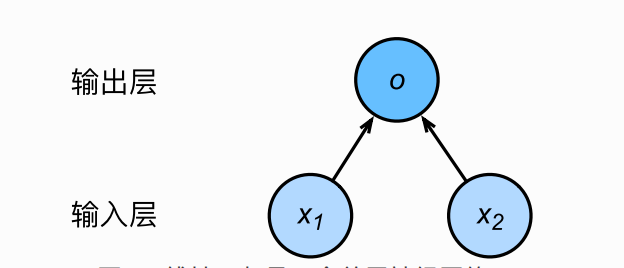

在图中，输入分别为 $x_1$ 和 $x_2$，因此输入层的输入个数为2。输入个数也叫特征数或特征向量维度。图中网络的输出为 $o$，输出层的输出个数1。将神经网络 $o$ 作为线性回归的输出，即 $\hat y = o$。由于输入层并不涉及计算，图中的神经网络层数为1。所以，线性回归是一个单层神经网络。输出层中的神经元与输入层中各个输入完全连接。因此，这里的输出层又叫全连接层，或叫稠密层

在模型训练或预测时，我们常常会同时处理多个数据样本并用到矢量计算。在介绍线性回归的矢量计算表达式之前，让我们先考虑对两个向量相加的方法。

In [5]:
# 下面定义两个1000维的向量

import torch
from time import time

In [6]:
import torch
a = torch.ones(1000)
b = torch.ones(1000)

In [7]:
# 方法1:将两个向量各个元素做标量相加
import torch
from time import time
start = time()
c= torch.zeros(1000)
for i in range(1000):
    c[i] = a[i]+b[i]
print(time()-start)

0.009573936462402344


In [8]:
# 方法2:将两个向量直接做矢量加法
start = time()
d = a+b
print(time()-start)

0.0003132820129394531


结果很明显，后者⽐前者更省时。因此，我们应该尽可能采⽤⽮量计算，以提升计算效率。

回到放假预测问题。如果我们对训练数据集中的3个房屋样本逐一预测价格，将得到

$$
\begin{cases}
\hat{y}^{(1)} = x_1^{(1)} w_1 + x_2^{(1)} w_2 + b, \\
\hat{y}^{(2)} = x_1^{(2)} w_1 + x_2^{(2)} w_2 + b, \\
\hat{y}^{(3)} = x_1^{(3)} w_1 + x_2^{(3)} w_2 + b.
\end{cases}
$$

现在，我们将上面3个等式转化成矢量计算。设  

$$
\hat{\boldsymbol{y}} = \begin{bmatrix} \hat{y}^{(1)} \\ \hat{y}^{(2)} \\ \hat{y}^{(3)} \end{bmatrix}, \quad 
\boldsymbol{X} = \begin{bmatrix} x_1^{(1)} & x_2^{(1)} \\ x_1^{(2)} & x_2^{(2)} \\ x_1^{(3)} & x_2^{(3)} \end{bmatrix}, \quad 
\boldsymbol{w} = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}
$$  

对3个房屋样本预测价格的矢量计算表达式为 $\hat y = Xw +b$，其中的加法运算使用了广播机制。

In [9]:
# 例如

a = torch.ones(3)
b = 10
print(a+b)

tensor([11., 11., 11.])


广义上讲，当数据样本数为 $n$，特征数为 $d$ 时，线性回归的矢量计算表达式为  

$$
\hat{\boldsymbol{y}} = \boldsymbol{X} \boldsymbol{w} + b
$$  

其中模型输出 $\hat{\boldsymbol{y}} \in \mathbb{R}^{n \times 1}$，批量数据样本特征 $\boldsymbol{X} \in \mathbb{R}^{n \times d}$，权重 $\boldsymbol{w} \in \mathbb{R}^{d \times 1}$，偏差 $b \in \mathbb{R}$。相应地，批量数据样本标签 $\boldsymbol{y} \in \mathbb{R}^{n \times 1}$。设模型参数 $\boldsymbol{\theta} = [w_1, w_2, b]^\top$，我们可以重写损失函数为  

$$
\ell(\boldsymbol{\theta}) = \frac{1}{2n} \left( \hat{\boldsymbol{y}} - \boldsymbol{y} \right)^\top \left( \hat{\boldsymbol{y}} - \boldsymbol{y} \right)
$$  

小批量随机梯度下降的迭代步骤将相应地改写为  

$$
\boldsymbol{\theta} \leftarrow \boldsymbol{\theta} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta})
$$  

其中梯度是损失有关3个为标量的模型参数的偏导数组成的向量：  

$$
\nabla_{\boldsymbol{\theta}} \ell^{(i)}(\boldsymbol{\theta}) 
= \begin{bmatrix} 
\frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_1} \\
\frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial w_2} \\
\frac{\partial \ell^{(i)}(w_1, w_2, b)}{\partial b} 
\end{bmatrix} 
= \begin{bmatrix} 
x_1^{(i)} \left( x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} \right) \\
x_2^{(i)} \left( x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} \right) \\
x_1^{(i)} w_1 + x_2^{(i)} w_2 + b - y^{(i)} 
\end{bmatrix} 
= \begin{bmatrix} x_1^{(i)} \\ x_2^{(i)} \\ 1 \end{bmatrix} \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

了解了线性回归的背景知识之后，现在我们可以动⼿实现它了。尽管强⼤的深度学习框架可以减少⼤量重复性⼯作，但若过于依赖它提供的便利，会导致我们很难深⼊理解深度学习是如何⼯作的。因此，本节将介绍如何只利⽤ Tensor 和 autograd 来实现⼀个线性回归的训练。⾸先，导⼊本节中实验所需的包或模块，其中的matplotlib包可⽤于作图，且设置成嵌⼊显示。

In [10]:
%matplotlib inline
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [11]:
# 生成数据集
num_inputs = 2
num_examples = 1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.from_numpy(np.random.normal(0,1,(num_examples,num_inputs)))
labels = true_w[0] *features[:,0]+true_w[1] * features[:,1] +true_b
labels += torch.from_numpy(np.random.normal(0,0.01,size=labels.size()))

In [12]:
print(features[0], labels[0])

tensor([-1.2450, -1.8437], dtype=torch.float64) tensor(7.9738, dtype=torch.float64)


In [13]:
def use_svg_display():
    display.set_matplotlib_formats('svg') # 设置图片格式为矢量图

def set_figsize(figsize = (3.5,2.5)):
    use_svg_display()
    plt.rcParams['figre.figsize'] = figsize # 设置图片尺寸大小，并调用设置图片格式的函数

set_figsize

<function __main__.set_figsize(figsize=(3.5, 2.5))>

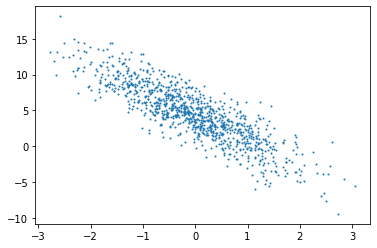

In [14]:
plt.scatter(features[:,1].numpy(),labels.numpy(),1)

In [15]:
print(list(range(num_examples)))
print(random.shuffle(list(range(num_examples))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [16]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 生成所有索引值 从0到999
    random.shuffle(indices) #随机打乱列表元素的顺序 符合小批量随机梯度
    for i in range(0,num_examples,batch_size): # 0到最大值，步长为 batch_size
        j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)]) # 注意这里最后一次可能不足一个batch 且index_select方法要求索引为长整型张量
        yield features.index_select(0,j),labels.index_select(0,j) # 返回值

In [17]:
batch_size = 10

for X,y in data_iter(batch_size,features,labels):
    print(X,y)
    break #生成第一个并打印

tensor([[ 0.0649, -0.4470],
        [-2.5557, -1.0110],
        [-1.2450, -1.8437],
        [-0.7911,  0.3134],
        [ 1.9329,  1.2244],
        [-0.5475, -0.1289],
        [ 0.9340,  0.4867],
        [ 0.5226, -0.9797],
        [-1.0631,  1.0012],
        [ 0.5307, -0.2195]], dtype=torch.float64) tensor([ 5.8473,  2.5230,  7.9738,  1.5435,  3.9081,  3.5280,  4.4116,  8.5784,
        -1.3390,  5.9942], dtype=torch.float64)


In [18]:
# 初始化模型参数
w = torch.tensor(np.random.normal(0,0.01,(num_inputs,1))) #先随机生成一个参数
b = torch.zeros(1)

In [19]:
w.requires_grad = True
b.requires_grad = True

In [20]:
# 定义模型
def linreg(X, w, b): 
    return torch.mm(X, w) + b

In [21]:
# 损失函数
def squared_loss(y_hat,y):
    return (y_hat -y.view(y_hat.size()))**2 /2

In [22]:
# 优化算法
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr *param.grad / batch_size # 防止这一步影响梯度的变化，故用.data 

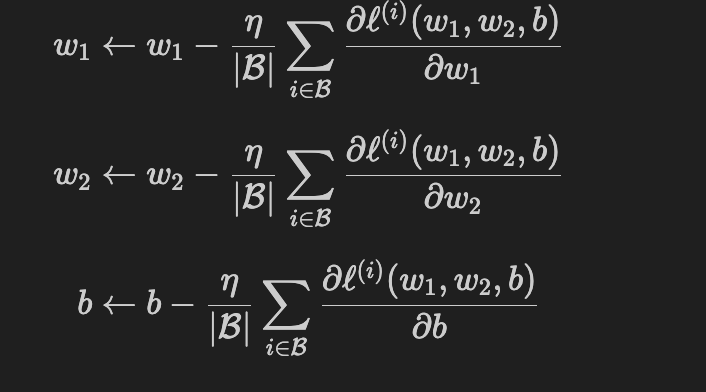

如上图所示，参数更新优化

In [23]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y).sum()
        l.backward()
        sgd([w,b],lr,batch_size)

        w.grad.data.zero_()
        b.grad.data.zero_()

    train_l = loss(net(features,w,b),labels)
    print('epoch %d,loss %f'%(epoch +1,train_l.mean().item()))

epoch 1,loss 0.021877
epoch 2,loss 0.000075
epoch 3,loss 0.000048


```python
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 生成所有索引值 从0到999
    random.shuffle(indices) #随机打乱列表元素的顺序 符合小批量随机梯度
    for i in range(0,num_examples,batch_size): # 0到最大值，步长为 batch_size
        j = torch.LongTensor(indices[i:min(i+batch_size,num_examples)]) # 注意这里最后一次可能不足一个batch 且index_select方法要求索引为长整型张量
        yield features.index_select(0,j),labels.index_select(0,j) # 返回值
        
for X,y in data_iter(batch_size,features,labels):
    print(X,y)
```

```python
def linreg(X,w,b):
    return torch.mm(X,w)+b
```

```python
def squared_loss(y_hat,y):
    return (y_hat -y.view(y_hat.size()))**2 /2
```

```python
def sgd(params,lr,batch_size):
    for param in params:
        param.data -= lr *param.grad / batch_size
```

In [24]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 2.0005],
        [-3.4007]], dtype=torch.float64, requires_grad=True)
4.2 
 tensor([4.2005], requires_grad=True)


可以看出，仅使用 `Tensor` 和 `autograd` 模块就可以很容易地实现一个模型。接下来学习更多深度学习模型，并介绍怎么用更简洁的代码来实现。

In [25]:
# 线性回归的简单实现
num_inputs = 2
num_examples =1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)),dtype=torch.float)
labels = true_w[0] *features[:,0] +true_w[1] *features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype=torch.float)

In [26]:
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features,labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)


`Data.TensorDataset` 操作实例如下
```python
import torch
from torch.utils.data import TensorDataset

# 创建示例数据
features = torch.tensor([[1, 2], [3, 4], [5, 6]])  # 3个样本，2个特征
labels = torch.tensor([10, 20, 30])  # 3个标签

# 组合成数据集
dataset = TensorDataset(features, labels)

# 访问第0个样本
print(dataset[0])  # 输出：(tensor([1, 2]), tensor(10))
# 访问第1个样本
print(dataset[1])  # 输出：(tensor([3, 4]), tensor(20))
```


In [27]:
# 定义模型
import torch.nn as nn

class LinearNet(nn.Module):
    def __init__(self,n_feature):
        #调用父类nn.Module的初始化方法，确保基类功能正常工作
        super(LinearNet,self).__init__()
        #定义一个线性层：输入特征数为n_feature，输出特征数为1（预测一个值）
        self.linear = nn.Linear(n_feature,1) 
        #nn.Linear实现y = X·w + b的线性变换，包含可学习参数w和b

    def forward(self,X):
        #将输入X传入线性层self.linear，得到预测输出y
        y = self.linear(X)
        return y
    
net = LinearNet(num_inputs)
print(net) # 使⽤print可以打印出⽹络的结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)


In [28]:
net = nn.Sequential(
    nn.Linear(num_inputs, 1))

print(net)
print(net[0]) # 表示第0层的参数。如果net不止一层 则net[1]表示第一层的参数。
#这里的net只有一层，故net[0]是唯一的参数。

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


```python
# 写法⼀
net = nn.Sequential(
 nn.Linear(num_inputs, 1)
 # 此处还可以传⼊其他层
 )

# 写法⼆
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
 ('linear', nn.Linear(num_inputs, 1))
 # ......
 ]))
print(net)
print(net[0])
```
除上述写法外，还有这些写法

In [29]:
for param in net.parameters():
    print(param)
    # 通过 net.parameter() 查看模型所有可学习参数，此函数返回一个生成器

Parameter containing:
tensor([[-0.4888, -0.6434]], requires_grad=True)
Parameter containing:
tensor([0.3184], requires_grad=True)


In [30]:
# 在使用 net 之前，我们需要初始化模型参数，如线性回归中的权重和偏差。
from torch.nn import init

init.normal_(net[0].weight,mean=0,std =0.01)
init.constant_(net[0].bias,val=0) #val 是value 的缩写

Parameter containing:
tensor([0.], requires_grad=True)

通过 `init.normal_` 将权重参数每个元素初始化为随机采样于均值为0、标准差为0.01的正态分布

In [31]:
# 定义损失函数
loss = nn.MSELoss()

我们也⽆须⾃⼰实现⼩批量随机梯度下降算法。 `torch.optim` 模块提供了很多常⽤的优化算法⽐如SGD、Adam和RMSProp等。下⾯我们创建⼀个⽤于优化 `net` 所有参数的优化器实例，并指定学习率为0.03的⼩批量随机梯度下降（SGD）为优化算法。

In [32]:
# 定义优化算法

import torch.optim as optim
optimizer = optim.SGD(net.parameters(),lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [33]:
for param_group in optimizer.param_groups:
    param_group['lr'] *= 0.1 # 学习率为之前的0.1倍

print(param_group)

{'params': [Parameter containing:
tensor([[0.0144, 0.0053]], requires_grad=True), Parameter containing:
tensor([0.], requires_grad=True)], 'lr': 0.003, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False}


In [34]:
num_epochs=3
for epoch in range(1,num_epochs+1):
    for X,y in data_iter:
        output = net(X)
        l = loss(output,y.view(-1,1))
        optimizer.zero_grad()
        l.backward()
        optimizer.step()
    #for param_group in optimizer.param_groups:
        #param_group['lr'] *= 0.1 # 学习率为之前的0.1倍
    

    print('epoch %d, loss: %f' % (epoch, l.item()))


epoch 1, loss: 6.721963
epoch 2, loss: 2.369136
epoch 3, loss: 2.183903


生成数据
```python
# 线性回归的简单实现
num_inputs = 2
num_examples =1000
true_w = [2,-3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0,1,(num_examples,num_inputs)),dtype=torch.float)
labels = true_w[0] *features[:,0] +true_w[1] *features[:,1]+true_b
labels += torch.tensor(np.random.normal(0,0.01,size = labels.size()),dtype=torch.float)
```

数据处理
```python
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features,labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset,batch_size,shuffle=True)
```

定义模型
```python
#定义模型
net = nn.Sequential(
    nn.Linear(num_inputs, 1))
```

初始化参数
```python
from torch.nn import init

init.normal_(net[0].weight,mean=0,std =0.01)
init.constant_(net[0].bias,val=0) #val 是value 的缩写
```

损失函数
```python
loss = nn.MSELoss()
```

优化方法
```python
import torch.optim as optim

optimizer = optim.SGD(net.parameters(),lr=0.03)
print(optimizer)
```



In [35]:
dense = net[0]
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.6018, -2.8401]], requires_grad=True)
4.2 Parameter containing:
tensor([3.4485], requires_grad=True)


上面代码讲解了使用 `Pytorch` 的简单实现模型

`torch.utils.data`模块提供有关数据处理的工具，比如选择小批量，输出小批量

`torch.nn`模块定义了大量神经网络的层

`torch.nn.init`模块定义了各种初始化方法

`torch.optim`模块提供了模型参数优化的方法

损失函数用于求梯度，优化参数是通过梯度改变参数，无直接关系。

另外，这里的损失函数MSE是均方差，已经取过平均，故后续`optimizer.step()`无需传入任何参数